In [1]:
; pip install scikit-learn

'pip install scikit-learn'

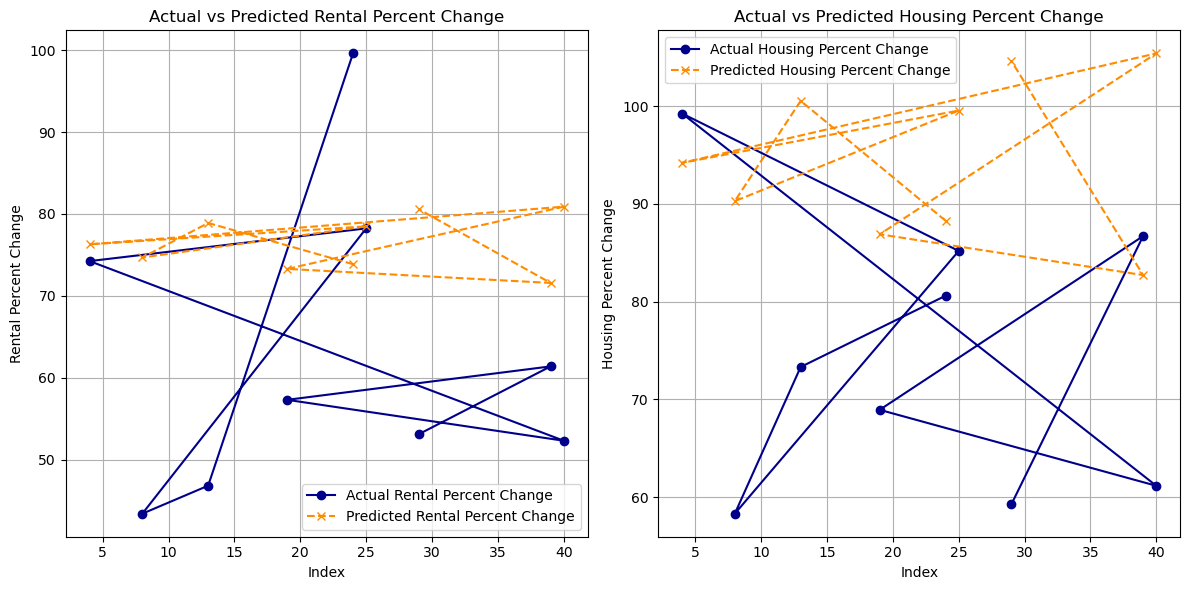

In [2]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the datasets (replace with your actual file paths or data loading code)
rental_change_df = pd.read_csv('../SOURCE/top_rental_change_states.csv')
change_states_df = pd.read_csv('../SOURCE/top_change_states.csv')
gdp_2023_df = pd.read_csv('../SOURCE/GDP_2023.csv')
gdp_2022_df = pd.read_csv('../SOURCE/GDP_2022.csv')

# Preprocess the GDP data by merging 2022 and 2023 and calculating the percentage change
gdp_df_merged = pd.merge(gdp_2023_df, gdp_2022_df, on='GeoFips')
gdp_df_merged['gdp_percent_change'] = ((gdp_df_merged['2023'] - gdp_df_merged['2022']) / gdp_df_merged['2022']) * 100

# Mapping state abbreviations to full names
state_abbr_to_full = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts',
    'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana',
    'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico',
    'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota',
    'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington',
    'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming', 'DC': 'District of Columbia'
}

# Map the state abbreviations in the rental and housing datasets
rental_change_df['StateName'] = rental_change_df['StateName'].map(state_abbr_to_full)
change_states_df['StateName'] = change_states_df['StateName'].map(state_abbr_to_full)

# Merge GDP data with rental and housing data
gdp_rental_change_df = pd.merge(gdp_df_merged[['GeoName_x', 'gdp_percent_change']], 
                                rental_change_df, left_on='GeoName_x', right_on='StateName', how='inner')

gdp_housing_change_df = pd.merge(gdp_df_merged[['GeoName_x', 'gdp_percent_change']], 
                                 change_states_df, left_on='GeoName_x', right_on='StateName', how='inner')

# Train-test split for rental data
X_rental = gdp_rental_change_df[['gdp_percent_change']]
y_rental = gdp_rental_change_df['rentalPercentChange']
X_train_rental, X_test_rental, y_train_rental, y_test_rental = train_test_split(X_rental, y_rental, test_size=0.2, random_state=42)

# Train-test split for housing data
X_housing = gdp_housing_change_df[['gdp_percent_change']]
y_housing = gdp_housing_change_df['housingPercentChange']
X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(X_housing, y_housing, test_size=0.2, random_state=42)

# Linear Regression for rental prediction
lr_rental = LinearRegression()
lr_rental.fit(X_train_rental, y_train_rental)
y_pred_rental = lr_rental.predict(X_test_rental)

# Linear Regression for housing prediction
lr_housing = LinearRegression()
lr_housing.fit(X_train_housing, y_train_housing)
y_pred_housing = lr_housing.predict(X_test_housing)

# Plot for rental percent change
plt.figure(figsize=(12, 6))

# Line plot for actual rental values
plt.subplot(1, 2, 1)
plt.plot(y_test_rental.index, y_test_rental, label='Actual Rental Percent Change', color='darkblue', marker='o')
plt.plot(y_test_rental.index, y_pred_rental, label='Predicted Rental Percent Change', color='darkorange', linestyle='--', marker='x')
plt.title('Actual vs Predicted Rental Percent Change')
plt.xlabel('Index')
plt.ylabel('Rental Percent Change')
plt.legend()
plt.grid(True)

# Plot for housing percent change
plt.subplot(1, 2, 2)
plt.plot(y_test_housing.index, y_test_housing, label='Actual Housing Percent Change', color='darkblue', marker='o')
plt.plot(y_test_housing.index, y_pred_housing, label='Predicted Housing Percent Change', color='darkorange', linestyle='--', marker='x')
plt.title('Actual vs Predicted Housing Percent Change')
plt.xlabel('Index')
plt.ylabel('Housing Percent Change')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
